In [1]:
%load_ext autoreload
%autoreload 2

/home/pranay/anaconda3/envs/google/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


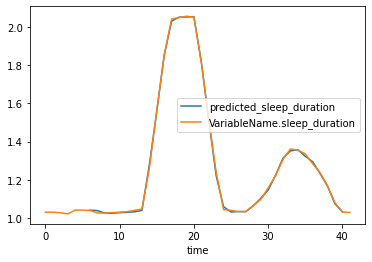

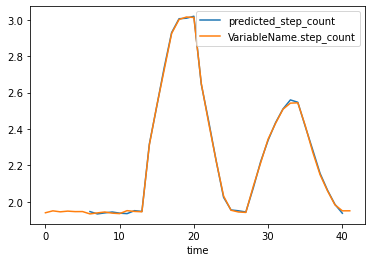

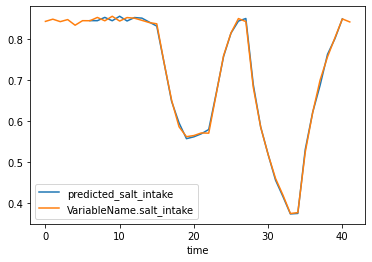

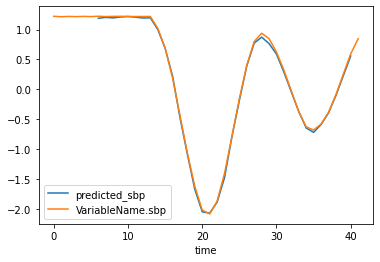

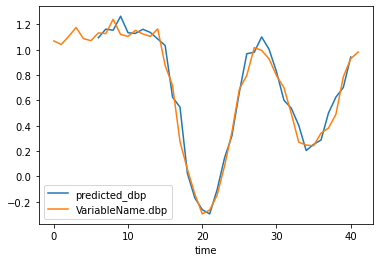

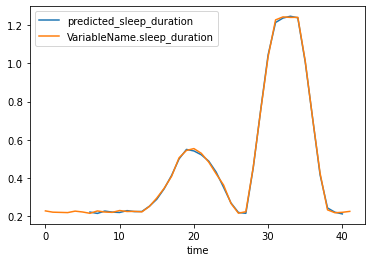

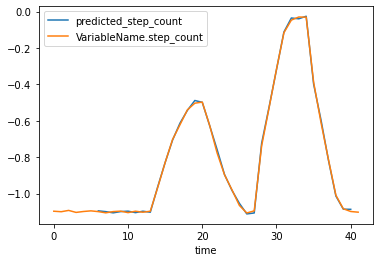

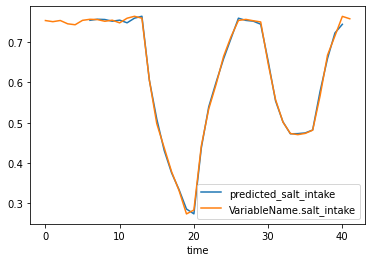

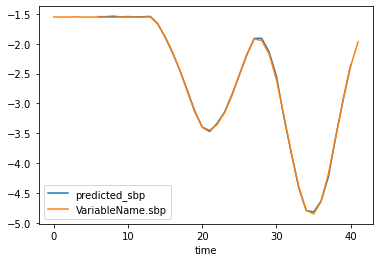

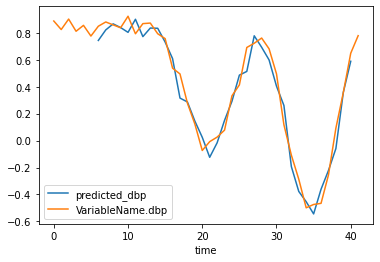

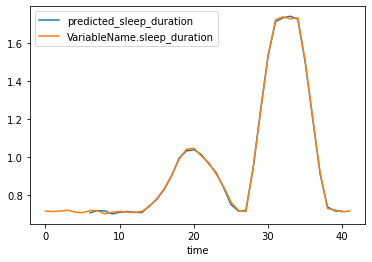

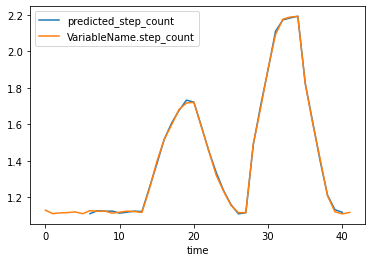

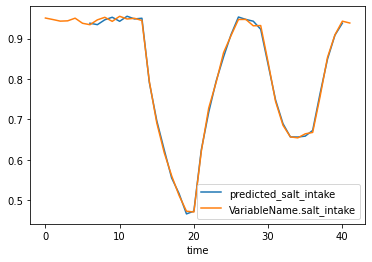

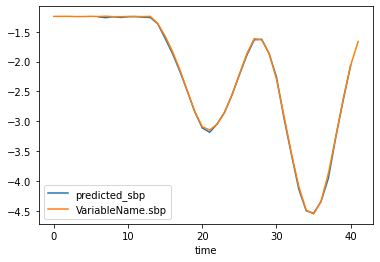

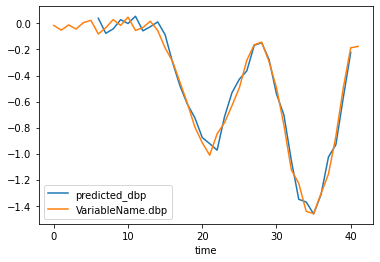

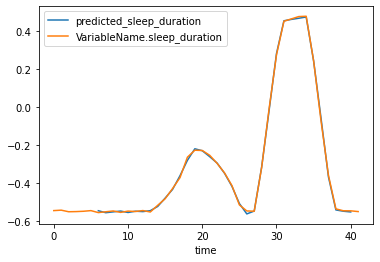

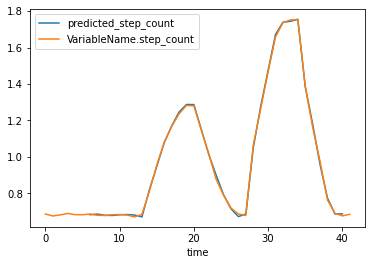

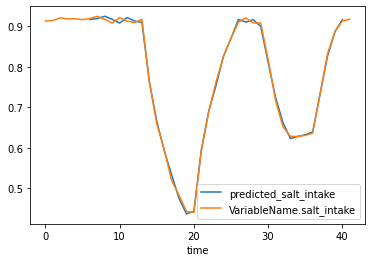

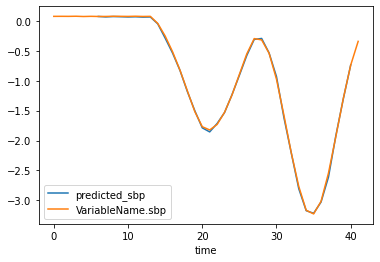

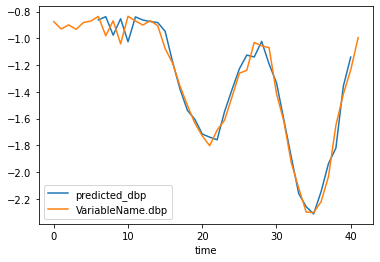

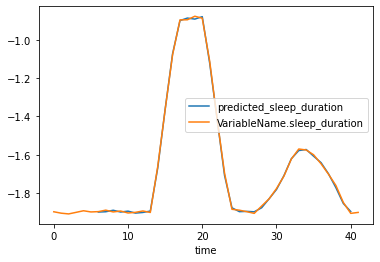

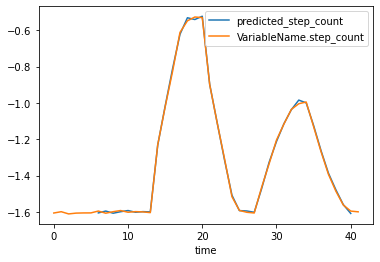

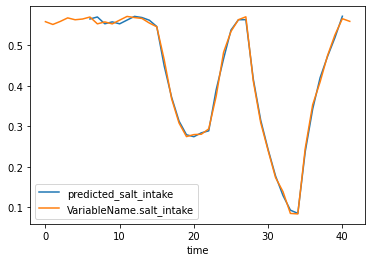

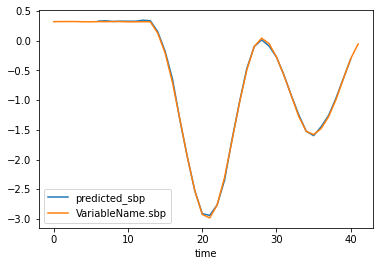

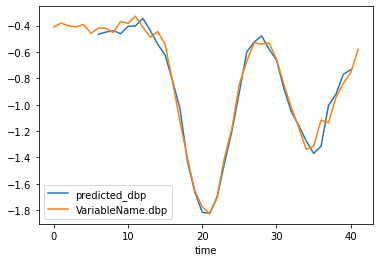

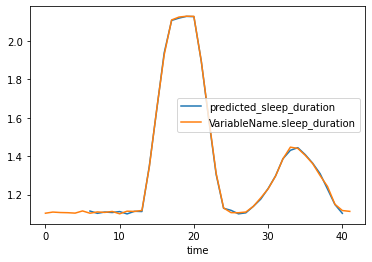

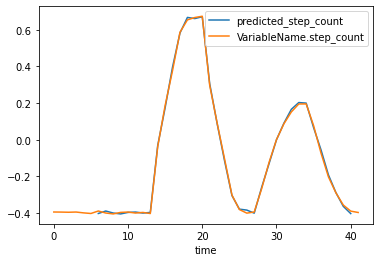

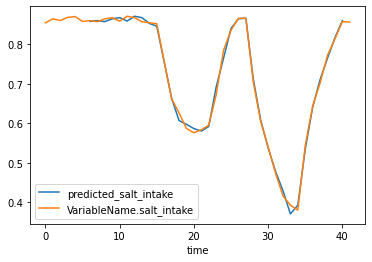

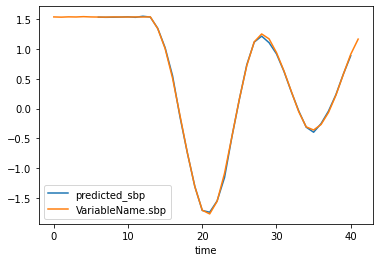

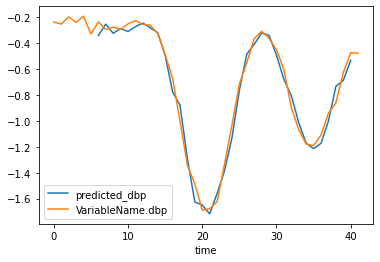

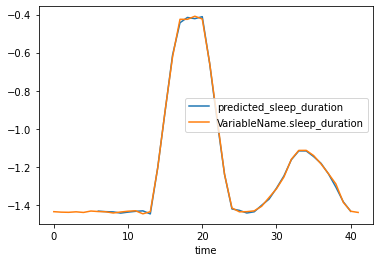

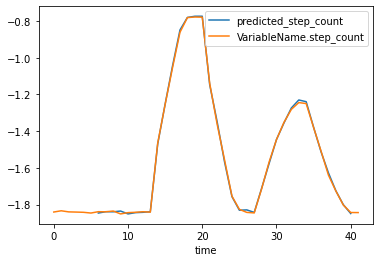

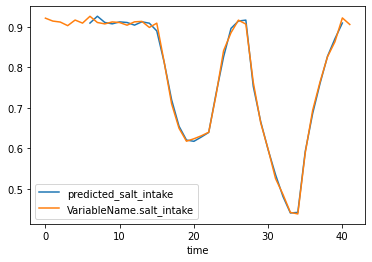

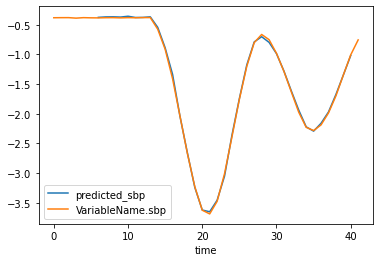

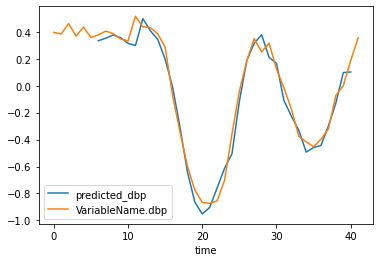

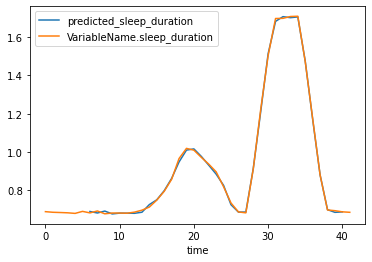

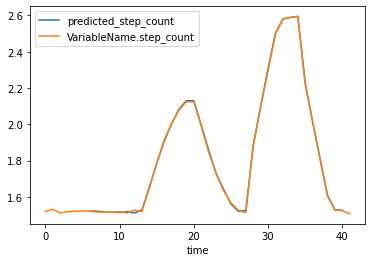

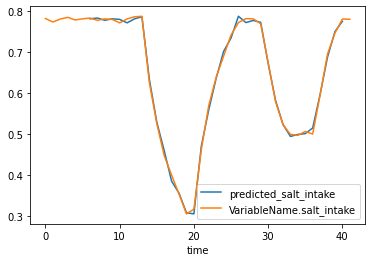

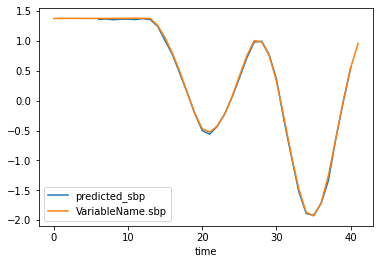

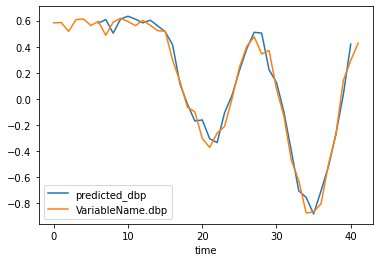

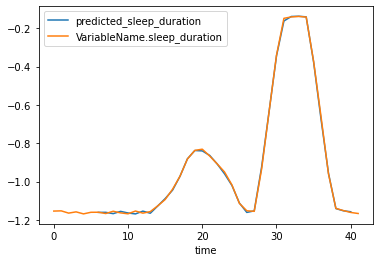

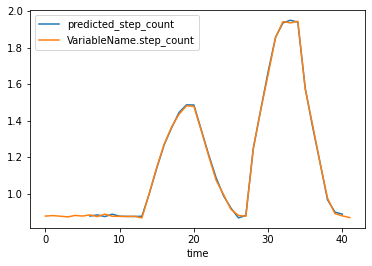

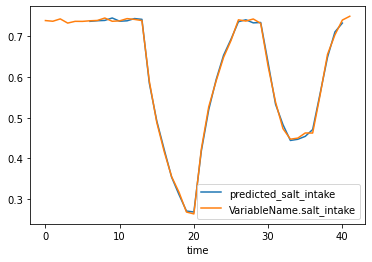

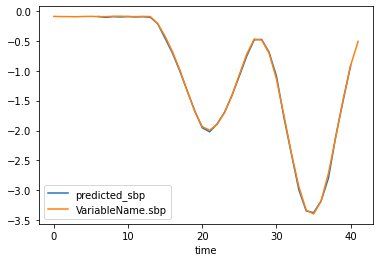

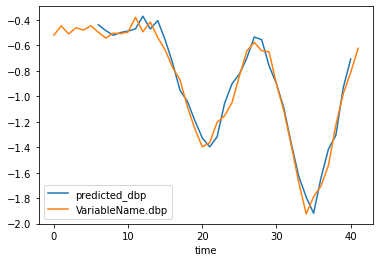

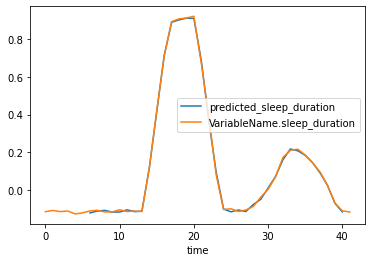

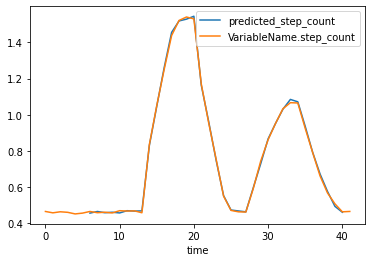

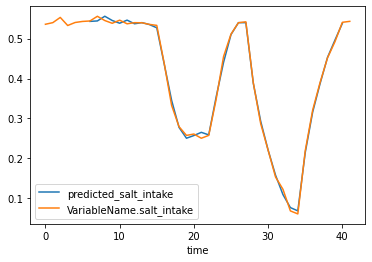

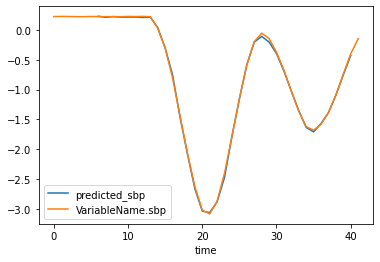

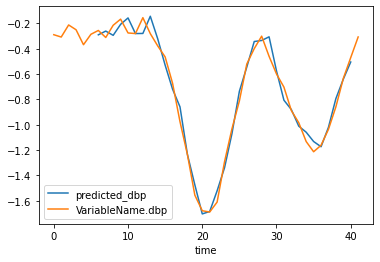

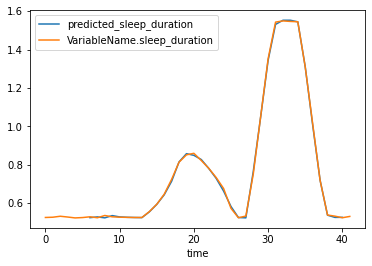

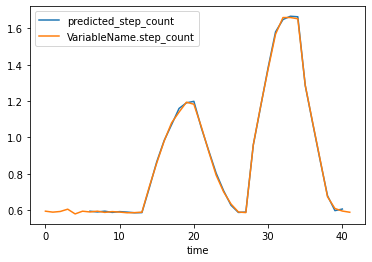

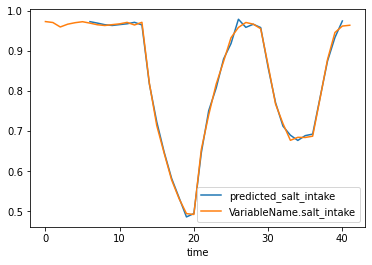

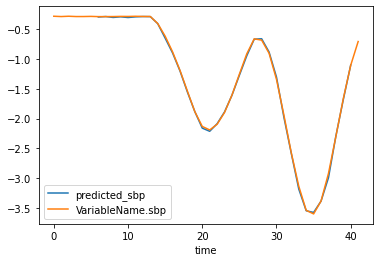

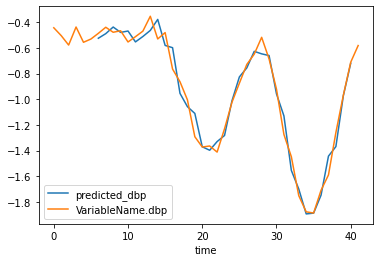

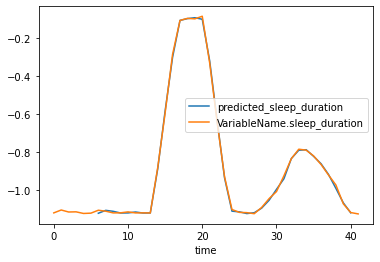

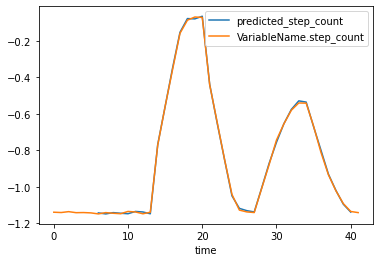

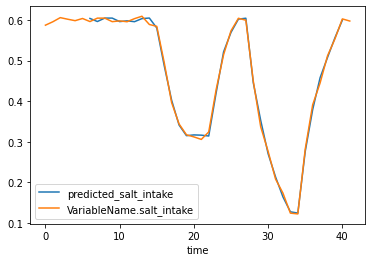

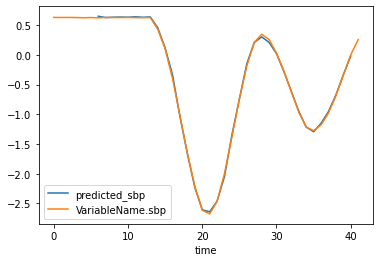

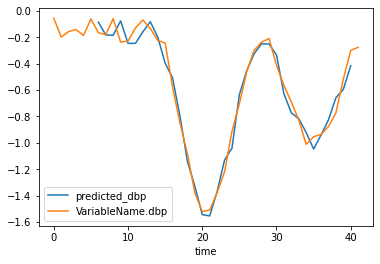

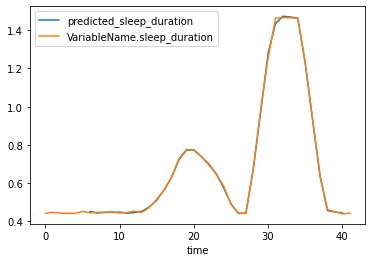

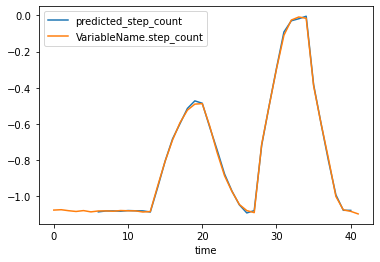

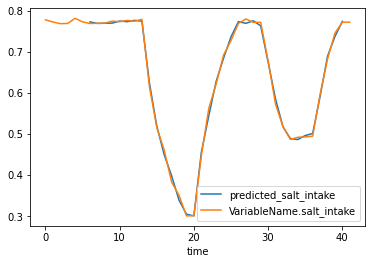

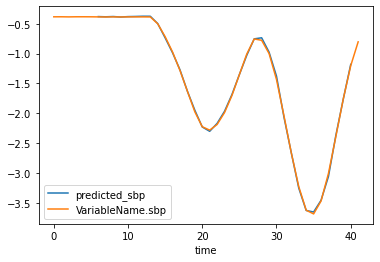

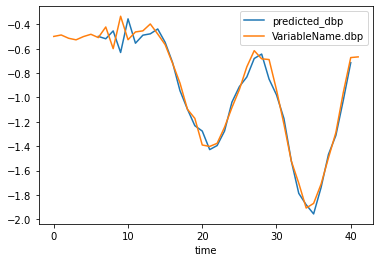

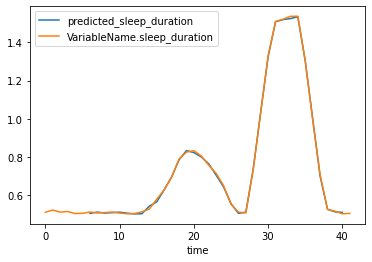

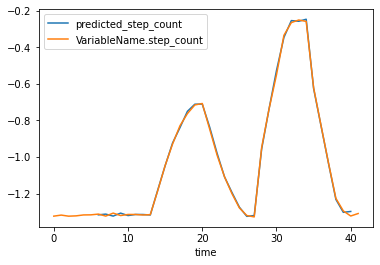

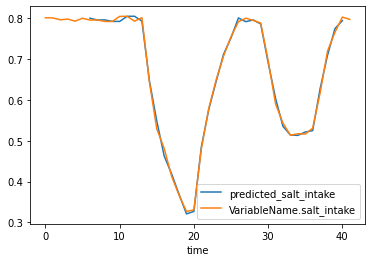

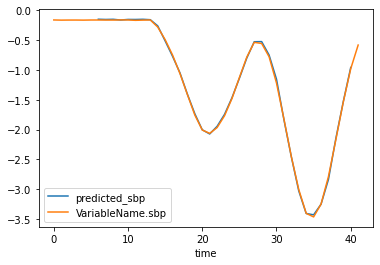

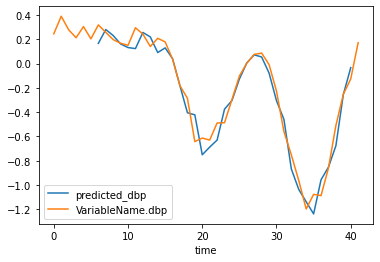

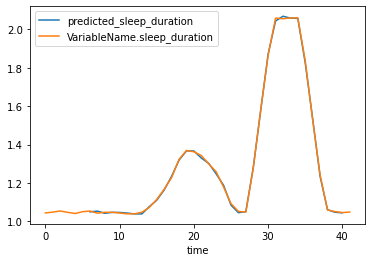

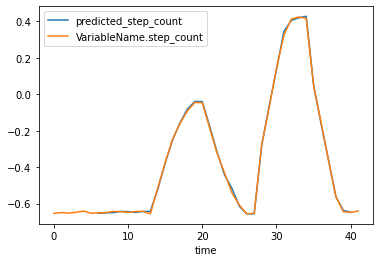

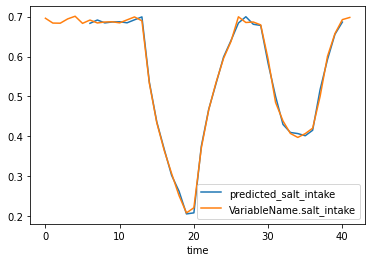

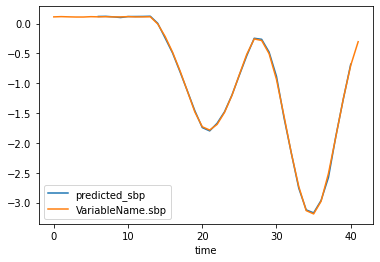

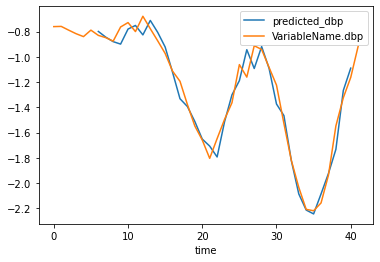

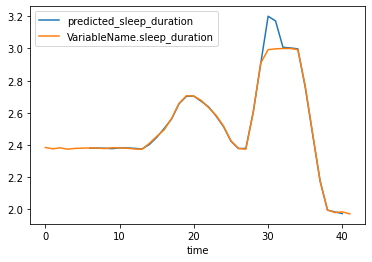

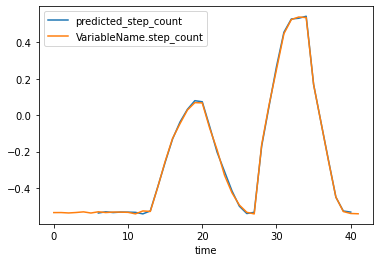

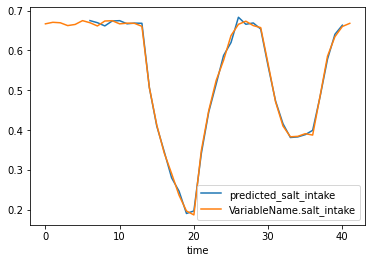

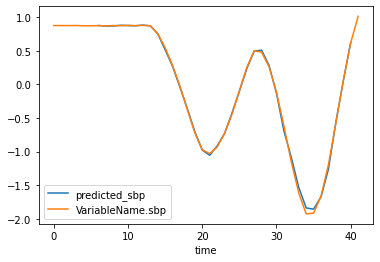

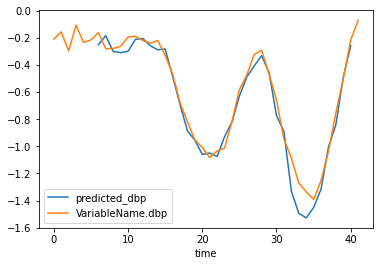

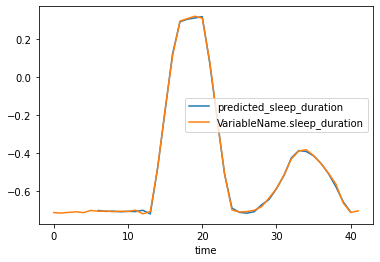

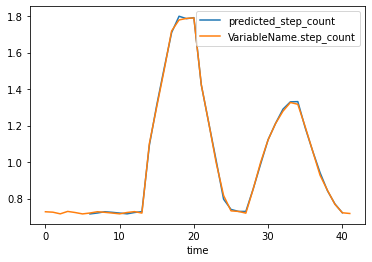

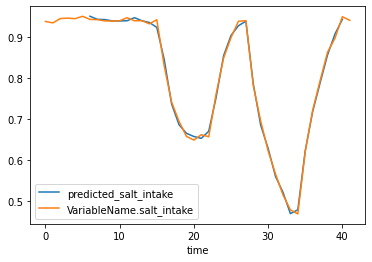

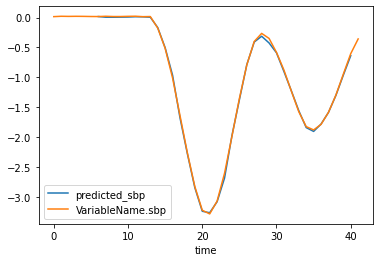

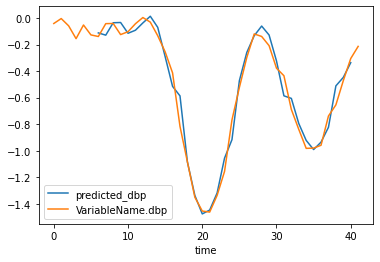

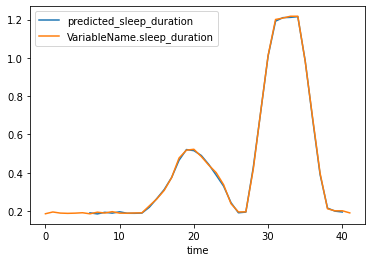

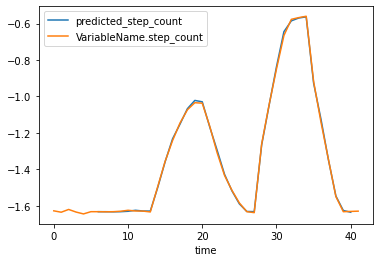

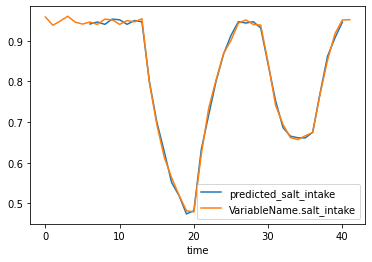

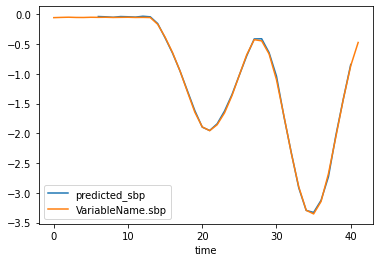

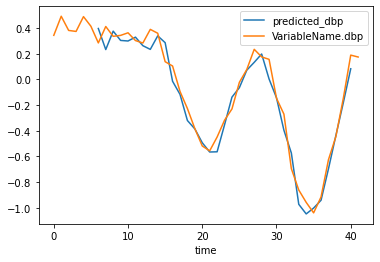

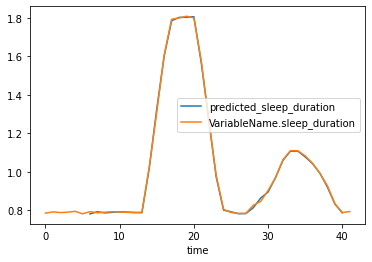

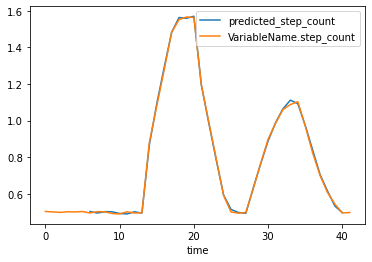

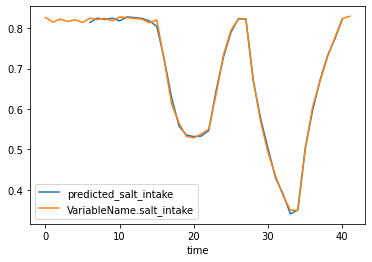

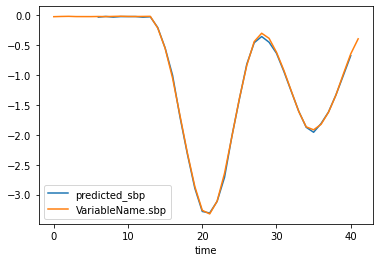

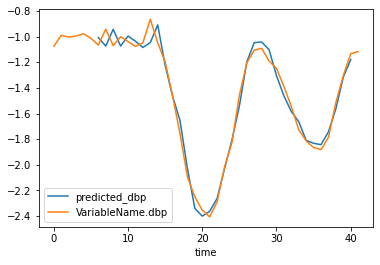

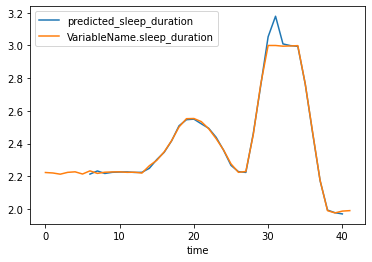

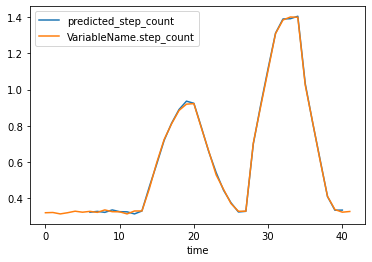

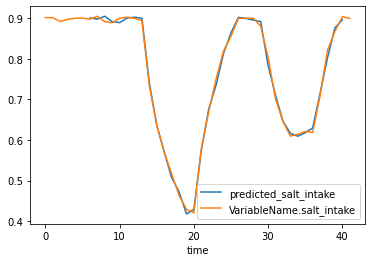

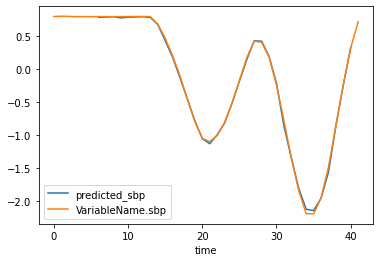

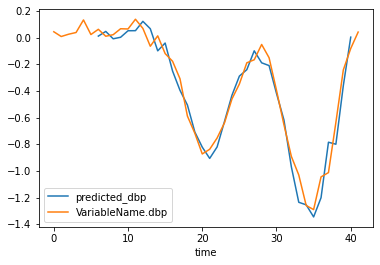

In [3]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
pd.options.mode.chained_assignment = None
df = pd.read_csv("../misc/tp.csv")
df.sort_values('time', inplace=True, ignore_index=True)
variable_list = ['sleep_duration', 'step_count', 'salt_intake', 'sbp', 'dbp'] 
for var in variable_list:
    df['predicted_' + var] = np.NaN
context_window = 6
forecast_horizon_num = 1
for user_id, df_temp2 in df.groupby('user_id'):
    df_temp = df_temp2.copy()
    for var in variable_list:
        df_temp['predicted_' + var].iloc[(context_window-1+forecast_horizon_num):] = df_temp['VariableName.' + var + '_horizon_'+str(forecast_horizon_num)+'_predict'].iloc[:-(context_window-1+forecast_horizon_num)]
        df_temp['time'] = np.array(list(range(df_temp.shape[0])))
        df_temp[['time', 'predicted_' + var, 'VariableName.' + var]].plot(x='time')